# Forest Fires Data Set
data set here : https://archive.ics.uci.edu/ml/datasets/Forest+Fires

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
df = pd.read_csv('forestfires.csv' , usecols = [4,8,7])

In [3]:
df.head()

,FFMC,ISI,temp
0,86.2,5.1,8.2
1,90.6,6.7,18.0
2,90.6,6.7,14.6
3,91.7,9.0,8.3
4,89.3,9.6,11.4


In [4]:
len(df)

517

# Linear Regression Model-2

In [5]:
df.columns

Index(['FFMC', 'ISI', 'temp'], dtype='object')

In [6]:
x = df [ [ 'FFMC', 'temp' ]]
y = df [ 'ISI' ]

In [7]:
x_train , x_test , y_train , y_test = train_test_split ( x, y, train_size = 0.8, random_state = 0)

In [8]:
#training
model2 = LinearRegression()
model2

LinearRegression()

In [9]:
model2.fit(x_train, y_train)

LinearRegression()

In [10]:
model2.predict([[80,4]])

array([2.9828728])

In [11]:
#test
ISI_pred = model2.predict(x_train)
ISI_pred

array([  9.30466045,   8.76179209,   9.58542105,   7.35708809,
         9.15672222,   9.51948297,  10.24106224,  10.07751243,
         8.96100303,  10.49967824,  10.38854998,   5.31070992,
         9.64133436,  -5.48463982,   7.55954292,   8.0723822 ,
         7.49479893,   8.9446931 ,  10.93071999,   8.19563029,
         9.01621798,   8.99082949,  11.24689387,   8.39389501,
         7.55325777,   9.26645378,   4.14292781,   9.27343728,
        10.43468638,   9.90718173,   6.59356253,  10.4260583 ,
         6.16880594,  11.29861707,   7.56393564,  10.35942187,
        11.5288033 ,  11.31188573,   9.15368095,  12.60546147,
         9.83984695,  10.14973567,  11.82377879,   9.54930944,
         9.72218567,   9.80373533,  11.42815031,   9.66557401,
         9.76762371,   7.34007981,   9.69096251,   3.78879513,
         5.14411885,  10.17652086,  11.42979488,   9.90578503,
         9.79395842,  10.69539743,  10.26086393,  10.63878578,
         9.76762371,   9.08006101,   7.66792303,  11.09

In [12]:
ISI_pred_test = model2.predict(x_test)
ISI_pred_test

array([ 6.70563701,  9.94888016,  8.8384533 , 11.09077805,  7.12780282,
       10.628761  ,  8.41953137, 10.83729837,  8.62293242,  5.76200384,
       10.35802517,  4.88410614, 11.12409626,  7.47055927,  7.48617085,
        8.16789888,  9.28346206, 12.27741563,  6.09822727, 11.30629892,
        7.55629904, 10.36431033,  5.22985861,  8.99152784,  9.69235921,
        8.96379643, 11.47219165, 11.34056336, 10.63364945,  9.482673  ,
        8.4344446 , 10.35149215,  9.17163545, 12.87200719, 12.1632461 ,
        9.43444156,  7.53555113, 10.02299583, 10.7363975 , 12.53952339,
        6.56044693, 10.65230231,  8.4095066 ,  9.91999991, 10.66906272,
        9.66557401, 10.25128963,  9.44865644,  9.46356967,  9.8377519 ,
        7.68373723,  8.94259805,  7.20401354,  9.78183859,  8.20914682,
        8.8957633 ,  4.8414615 , -0.30355598,  8.95332117,  8.45634134,
        8.20121709, 11.51483629, 11.49618344, 10.69539743,  8.28695686,
        9.56282596,  9.34077207, 10.38550871,  7.17184416, 10.63

In [13]:
test = pd.concat([ x_test , y_test ], axis='columns')
test.head()

,FFMC,temp,ISI
213,87.6,11.0,5.0
435,90.8,23.8,5.6
343,91.5,15.9,7.5
230,92.9,26.4,9.2
171,85.6,17.4,6.6


In [14]:
dt=pd.concat([test.reset_index(), pd.Series(ISI_pred_test, name='predicted')] , axis='columns')
dt.head()

,index,FFMC,temp,ISI,predicted
0,213,87.6,11.0,5.0,6.705637
1,435,90.8,23.8,5.6,9.948880
2,343,91.5,15.9,7.5,8.838453
3,230,92.9,26.4,9.2,11.090778
4,171,85.6,17.4,6.6,7.127803


# วัดประสิทธิภาพของโมเดล

In [15]:
print('MAE = ', metrics.mean_absolute_error(y_test, ISI_pred_test))
print('MSE = ', metrics.mean_squared_error(y_test, ISI_pred_test))
print('RMSE = ', np.sqrt(metrics.mean_squared_error(y_test, ISI_pred_test)))

MAE =  2.41053976988231
MSE =  8.723227520116597
RMSE =  2.9535110496012362


In [16]:
#แสดงค่าความแม่นยำด้วย R-Square หากมีค่าเป็น 1 แสดงว่าแม่นยำที่สุด
print("Score = ",metrics.r2_score(y_test, ISI_pred_test))

Score =  0.46816640133778453


# Linear Regression Model-1

In [17]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv" , usecols = [7,8,9,10])
df

,ISI,temp,RH,wind
0,5.1,8.2,51,6.7
1,6.7,18.0,33,0.9
2,6.7,14.6,33,1.3
3,9.0,8.3,97,4.0
4,9.6,11.4,99,1.8
...,...,...,...,...
512,1.9,27.8,32,2.7
513,1.9,21.9,71,5.8
514,1.9,21.2,70,6.7
515,11.3,25.6,42,4.0


In [18]:
df.columns

Index(['ISI', 'temp', 'RH', 'wind'], dtype='object')

In [19]:
x=df[['temp','RH','wind']]
y=df['ISI']

In [20]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.8,random_state=0)

In [21]:
#training
model1 = LinearRegression()
model1

LinearRegression()

In [22]:
model1.fit(x_train, y_train)

LinearRegression()

In [23]:
y_pred = model1.predict(x_test)

In [24]:
#test
ISI_pred = model1.predict(x_train)
ISI_pred

array([ 7.80743571,  5.56391154,  8.94703895,  9.36030637,  8.37034074,
        8.86615467, 11.64751526,  9.45312654,  5.91141141,  9.85424607,
        9.18379705,  8.64918542,  5.16505199,  7.92536432,  8.53645553,
        7.86135424,  8.46733495, 11.49983295,  9.00693039, 11.10634856,
       10.30251139,  9.47304909,  8.41341642,  8.54394123,  8.24327701,
        9.33683743,  7.93778834,  7.75937622,  8.7274312 ,  5.69205122,
        7.86135424,  7.38476697,  8.42550175,  8.10063698,  7.92802557,
        4.99095053,  8.37896497,  7.47456854,  9.27649052, 11.78891862,
        5.94767864,  9.54440535,  7.74261588,  9.27649052,  9.36690693,
       11.19977364,  9.00693039,  6.96924522,  6.97154504, 11.47798075,
        7.83254415,  8.87632437,  9.69713969,  6.66759191,  9.24098174,
       11.82963604,  3.71375653,  7.93211842,  7.52985625,  7.11862243,
        7.2910844 , 12.61569693,  9.12764694,  8.80603841,  9.572854  ,
       10.21207224, 12.78585908,  9.85573613, 11.29234042, 12.00

In [25]:
ISI_pred_test = model1.predict(x_test)
ISI_pred_test

array([ 6.49865359,  8.82330963,  7.55446373, 11.14370474,  7.79438404,
       10.60150346,  9.53476928,  7.40980001,  6.68370185,  4.72958496,
        7.11558691,  5.56391154, 10.18024938,  5.12988191,  5.43390327,
        6.15986483,  8.15488428, 11.61581908,  3.97125409, 10.93957926,
        6.48840269,  9.83151283,  7.70128774,  6.97203317,  9.38314356,
        7.40315397, 10.68517568, 10.00503213, 10.66678868,  7.53086809,
        6.7364591 , 10.3812453 ,  7.04686334, 13.07473686, 10.2460583 ,
        9.6072015 ,  5.99168086,  5.7757462 , 10.41786987, 13.42332396,
       10.70881681,  8.69761919,  8.55357731,  8.27193766,  9.26038058,
        9.32694796, 11.71612495,  7.43170075,  7.87680386,  8.66579632,
        7.67621487,  6.52262932,  5.80996701, 10.13356316,  6.56880876,
        6.00043179,  3.58112684,  9.46381994,  8.47267028,  6.89013705,
        7.96671931, 10.82783847, 11.84217684, 10.2572171 ,  7.42297257,
        6.72793881,  8.5715673 , 10.38554605,  6.56891271, 10.87

In [26]:
test = pd.concat([ x_test , y_test ], axis='columns')
test

,temp,RH,wind,ISI
213,11.0,46,5.8,5.0
435,23.8,51,1.8,5.6
343,15.9,51,4.5,7.5
230,26.4,21,4.5,9.2
171,17.4,50,4.0,6.6
...,...,...,...,...
305,19.0,52,2.2,5.7
48,11.8,35,1.8,4.1
341,15.7,51,2.2,6.5
373,20.3,42,2.7,13.9


In [27]:
dt=pd.concat([test.reset_index(), pd.Series(ISI_pred_test, name='predicted')] , axis='columns')
dt

,index,temp,RH,wind,ISI,predicted
0,213,11.0,46,5.8,5.0,6.498654
1,435,23.8,51,1.8,5.6,8.823310
2,343,15.9,51,4.5,7.5,7.554464
3,230,26.4,21,4.5,9.2,11.143705
4,171,17.4,50,4.0,6.6,7.794384
...,...,...,...,...,...,...
409,305,19.0,52,2.2,5.7,7.313795
410,48,11.8,35,1.8,4.1,4.287644
411,341,15.7,51,2.2,6.5,6.095809
412,373,20.3,42,2.7,13.9,8.005133


# วัดประสิทธิภาพของโมเดล

In [28]:
print('MAE = ', metrics.mean_absolute_error(y_test, ISI_pred_test))
print('MSE = ', metrics.mean_squared_error(y_test, ISI_pred_test))
print('RMSE = ', np.sqrt(metrics.mean_squared_error(y_test, ISI_pred_test)))

MAE =  2.822502335879815
MSE =  19.0850645999012
RMSE =  4.368645625351317


In [29]:
#แสดงค่าความแม่นยำด้วย R-Square หากมีค่าเป็น 1 แสดงว่าแม่นยำที่สุด
print("Score = ",metrics.r2_score(y_test, ISI_pred_test))

Score =  0.1559723531308186


In [30]:
print('Coefficient:', model1.coef_)
print('Intercept:', model1.intercept_)
print('Mean squared error (MSE): %.2f' % metrics.mean_squared_error(y_test, y_pred))
print('Coefficient of determination (R^2): %.2f' % metrics.r2_score(y_test, y_pred))

Coefficient: [0.36647315 0.00862424 0.60233037]
Intercept: -1.4227820016757136
Mean squared error (MSE): 19.09
Coefficient of determination (R^2): 0.16


# FFMC

In [31]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv" , usecols = [4,7])
df

,FFMC,ISI
0,86.2,5.1
1,90.6,6.7
2,90.6,6.7
3,91.7,9.0
4,89.3,9.6
...,...,...
512,81.6,1.9
513,81.6,1.9
514,81.6,1.9
515,94.4,11.3


# FFMC with ISI

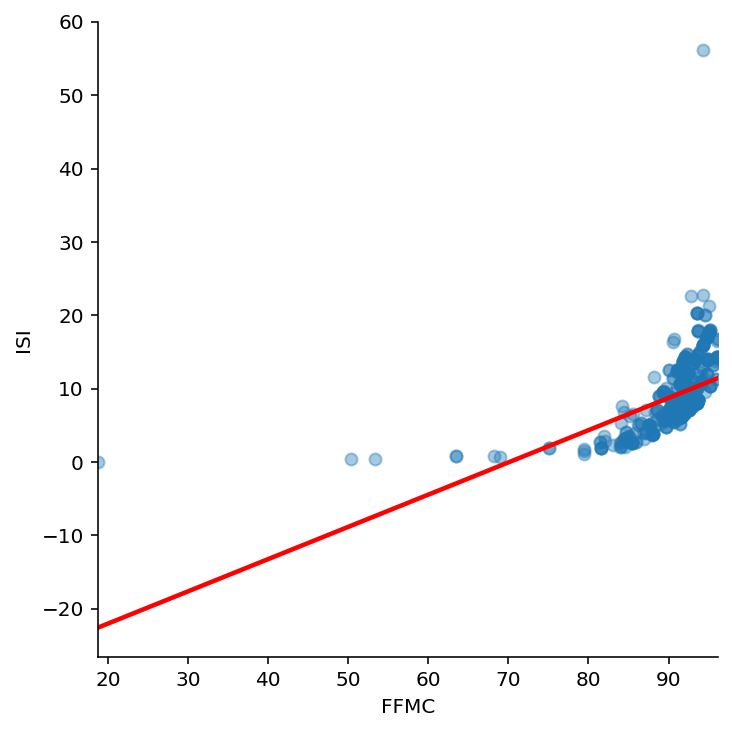

In [32]:
#กราฟแสดงความสัมพันธ์ระหว่าง ISI กับ FFMC
sns.lmplot(x='FFMC',y='ISI',data=df ,ci=None,
          scatter_kws={'alpha':0.4},
          line_kws={'color':'red'})

# linear regression

In [33]:
#linear Regrssion
x = df[['FFMC']]
y = df['ISI']
x_train , x_test , y_train , y_test = train_test_split ( x, y, train_size = 0.8, random_state = 0)
model_FFMC = LinearRegression()
model_FFMC

LinearRegression()

In [34]:
#train
model_FFMC.fit(x_train, y_train)

LinearRegression()

In [35]:
model_FFMC.score( x_train , y_train )

0.24947098336446738

In [36]:
print('coefficients: ', model_FFMC.coef_)
print('Intercept: ', model_FFMC.intercept_)

coefficients:  [0.40886053]
Intercept:  -28.001864744408266


In [37]:
ISI_FFMC = model_FFMC.predict(x_train)
ISI_FFMC

array([  9.00001291,   8.9182408 ,   9.49064554,   8.50938028,
         9.6950758 ,   9.36798738,   9.94039212,  10.55368291,
         9.20444317,   9.73596186,  10.26748054,   6.83305212,
         9.20444317,  -7.39529421,   7.60988712,   9.44975949,
         9.40887343,   9.16355712,  10.3901387 ,   9.20444317,
         8.95912686,   9.44975949,  10.79899922,   8.55026633,
         7.97786159,   9.24532922,   4.50254712,   8.8364687 ,
        10.55368291,   9.57241765,   7.40545685,  10.06305028,
         6.38330554,  10.75811317,   5.36115422,   9.98127817,
        10.22659449,   9.98127817,   8.87735475,  10.92165738,
         9.53153159,  10.30836659,  10.88077133,   9.6133037 ,
         9.44975949,   9.65418975,  10.14482238,   9.77684791,
         9.77684791,   8.50938028,   9.28621528,   5.32026817,
         6.62862185,   9.73596186,  11.04431554,   9.65418975,
        10.22659449,  10.22659449,   9.77684791,  10.55368291,
         9.77684791,   9.20444317,  10.22659449,   9.98

In [38]:
ISI_FFMC_test = model_FFMC.predict(x_test)
ISI_FFMC_test

array([ 7.81431738,  9.12267107,  9.40887343,  9.98127817,  6.99659633,
       10.14482238,  9.04089896, 10.88077133,  9.08178501,  6.30153343,
       10.06305028,  6.91482422, 10.02216422,  8.8364687 ,  8.9182408 ,
        8.8364687 ,  9.24532922, 11.20785975,  7.52811501, 10.30836659,
        8.79558264,  9.6950758 ,  6.5877358 ,  9.40887343,  9.20444317,
        9.04089896, 10.55368291, 11.28963186,  9.85862001,  9.53153159,
        9.16355712,  9.44975949,  9.81773396, 11.2487458 , 10.92165738,
        9.36798738,  8.01874764, 10.75811317,  9.81773396, 10.79899922,
        5.36115422, 10.75811317,  8.63203843,  9.81773396,  9.77684791,
        9.77684791,  8.34583607,  9.53153159,  9.65418975,  9.65418975,
        8.30495001,  9.28621528,  8.50938028,  9.94039212,  9.40887343,
        9.04089896,  6.42419159, -2.03922131,  9.65418975,  8.87735475,
        8.87735475, 11.04431554, 10.14482238, 10.22659449,  8.8364687 ,
        9.81773396,  8.87735475,  9.44975949,  7.40545685, 10.88

In [39]:
FFMC_test = pd.concat([ x_test , y_test ], axis='columns')
FFMC_test 

,FFMC,ISI
213,87.6,5.0
435,90.8,5.6
343,91.5,7.5
230,92.9,9.2
171,85.6,6.6
...,...,...
154,93.4,8.1
49,87.6,5.0
100,91.4,10.6
153,94.3,15.9


In [40]:
FFMC_test_dt=pd.concat([FFMC_test.reset_index(), pd.Series(ISI_FFMC_test, name='predicted')] , axis='columns')
FFMC_test_dt

,index,FFMC,ISI,predicted
0,213,87.6,5.0,7.814317
1,435,90.8,5.6,9.122671
2,343,91.5,7.5,9.408873
3,230,92.9,9.2,9.981278
4,171,85.6,6.6,6.996596
...,...,...,...,...
99,154,93.4,8.1,10.185708
100,49,87.6,5.0,7.814317
101,100,91.4,10.6,9.367987
102,153,94.3,15.9,10.553683


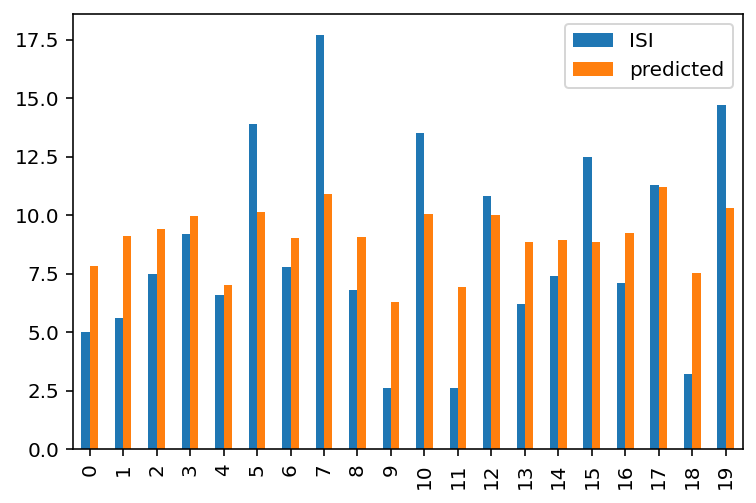

In [41]:
FFMC_test_dt[:20][['ISI','predicted']].plot(kind="bar")
plt.show()

# วัดประสิทธิภาพของโมเดล

In [42]:
#วัดประสิทธิภาพของโมเดล
print('MAE = ', metrics.mean_absolute_error(y_test, ISI_FFMC_test))
print('Mean squared error (MSE) = ', metrics.mean_squared_error(y_test, ISI_FFMC_test))
print('RMSE = ', np.sqrt(metrics.mean_squared_error(y_test, ISI_FFMC_test)))
#ถ้าค่าเป็น 1 แสดงว่าแม่นยำที่สุด
print("Coefficient of determination (R2-Score) = ",metrics.r2_score(y_test, ISI_FFMC_test))

MAE =  2.462654801269097
Mean squared error (MSE) =  9.041677647260158
RMSE =  3.00693825132146
Coefficient of determination (R2-Score) =  0.4487512850035339


In [43]:
#แสดงค่าความแม่นยำด้วย R-Square หากมีค่าเป็น 1 แสดงว่าแม่นยำที่สุด
print("Score = ",metrics.r2_score(y_test, ISI_FFMC_test))

Score =  0.4487512850035339


In [44]:
print('Coefficient:', model_FFMC.coef_)
print('Intercept:', model_FFMC.intercept_)
print('Mean squared error (MSE): %.2f' % metrics.mean_squared_error(y_test, ISI_FFMC_test))
print('Coefficient of determination (R^2): %.2f' % metrics.r2_score(y_test, ISI_FFMC_test))

Coefficient: [0.40886053]
Intercept: -28.001864744408266
Mean squared error (MSE): 9.04
Coefficient of determination (R^2): 0.45


# TEMP

In [45]:
df = pd.read_csv( 'forestfires.csv' , usecols = [7,8,4,9,10] )
df.head()

,FFMC,ISI,temp,RH,wind
0,86.2,5.1,8.2,51,6.7
1,90.6,6.7,18.0,33,0.9
2,90.6,6.7,14.6,33,1.3
3,91.7,9.0,8.3,97,4.0
4,89.3,9.6,11.4,99,1.8


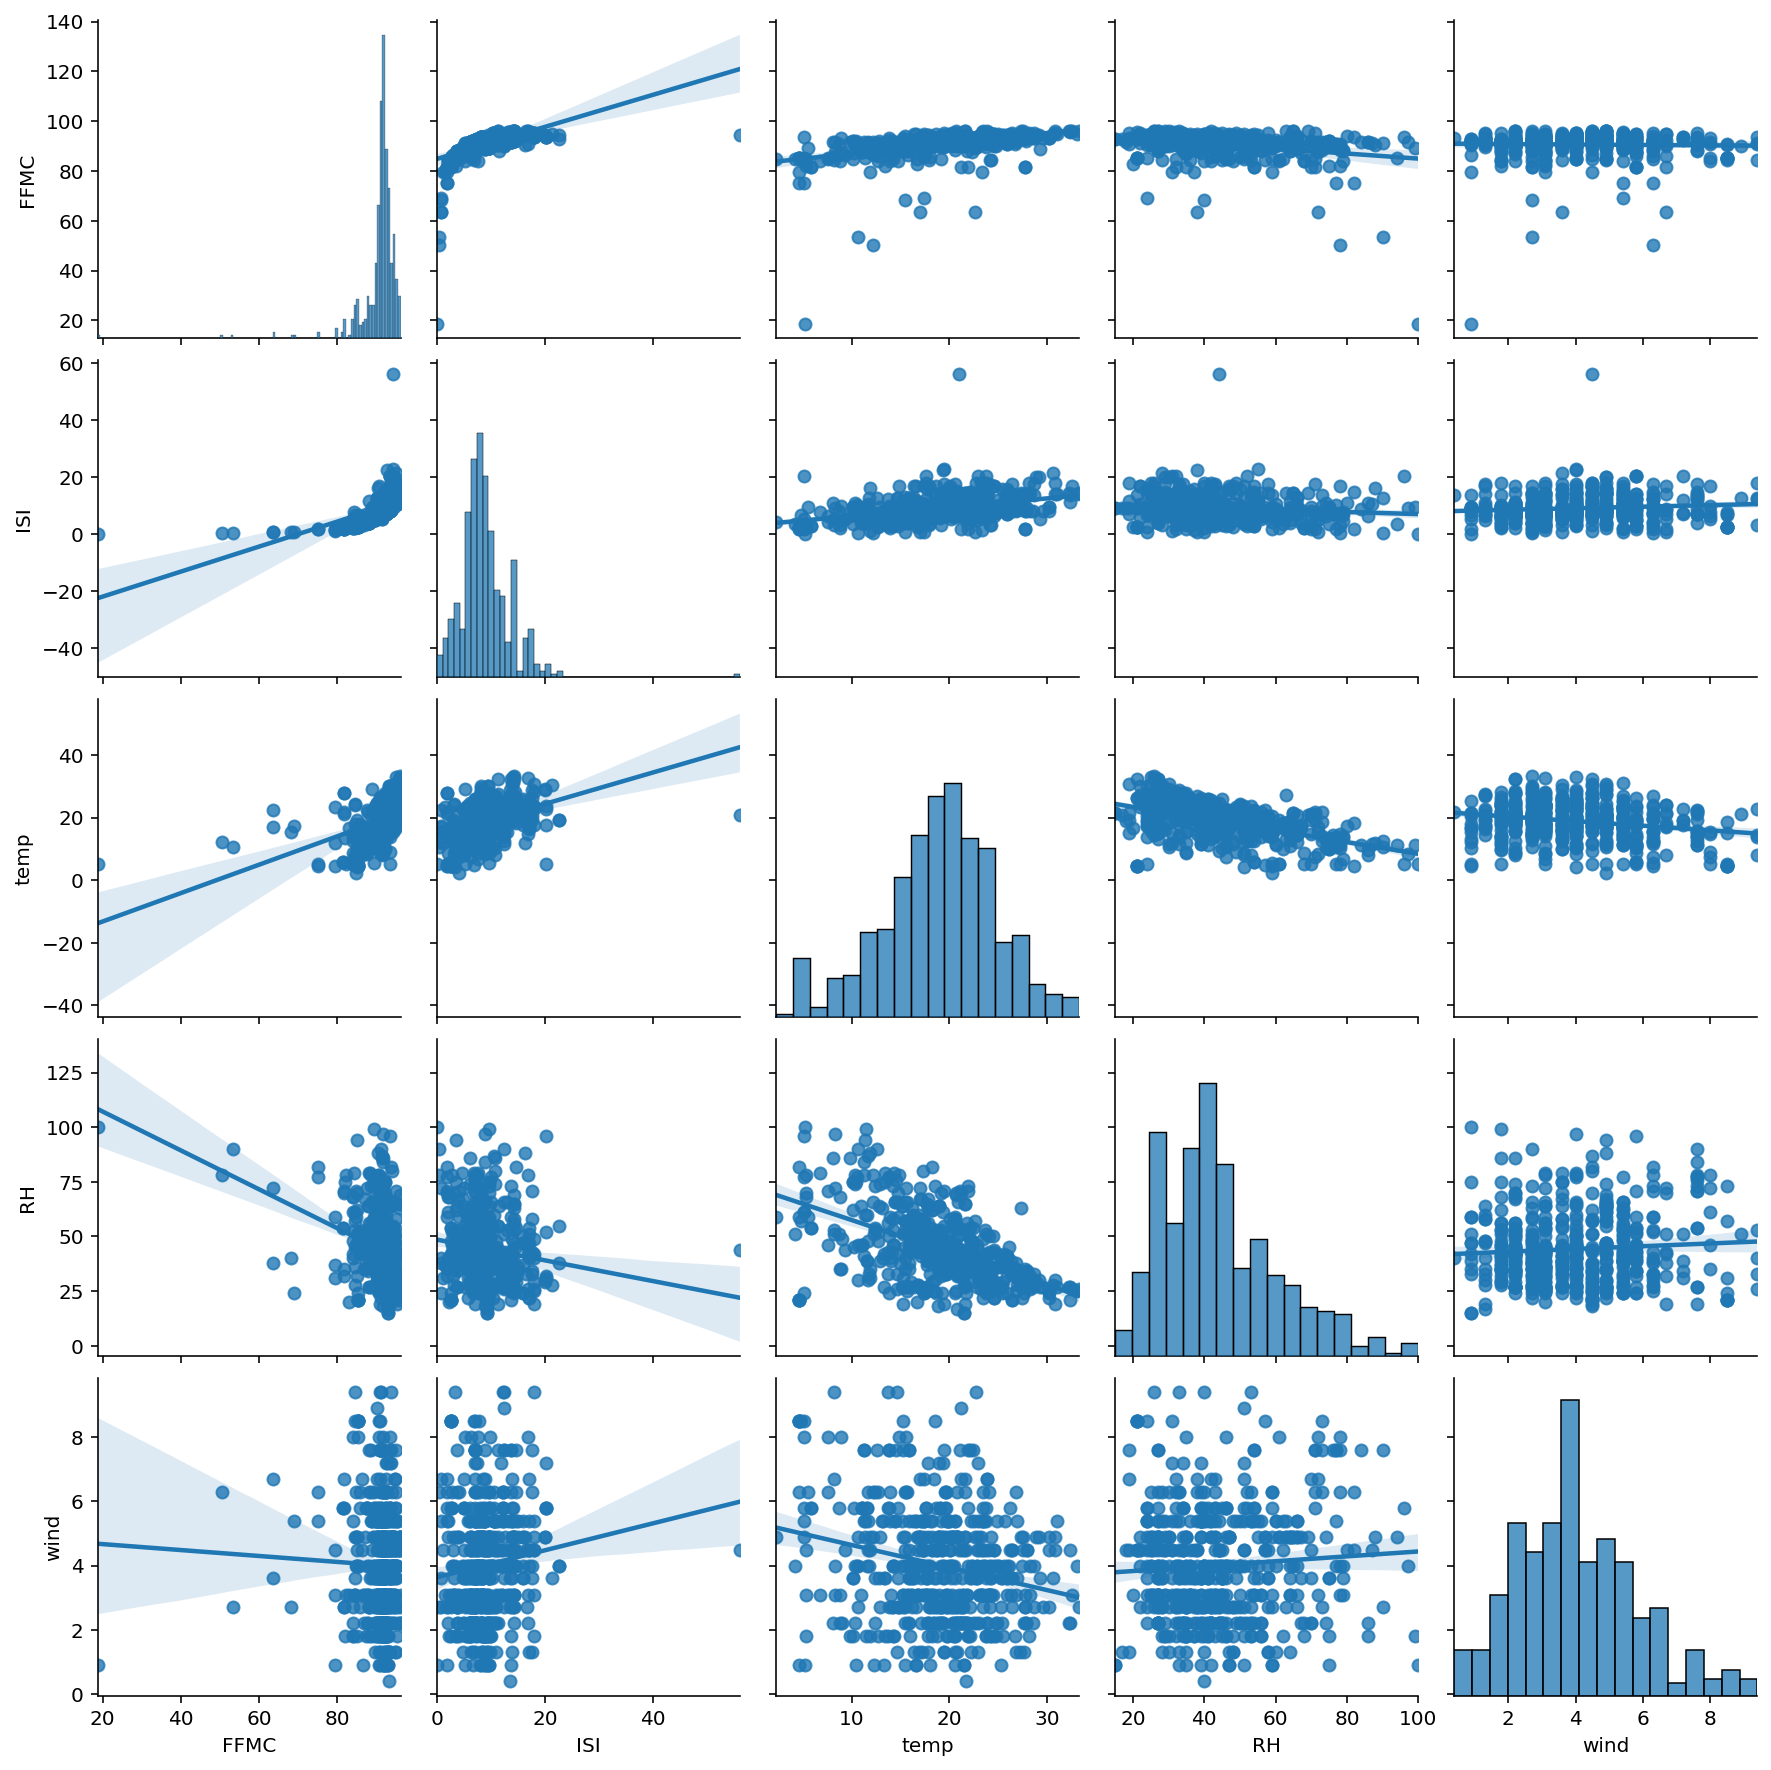

In [46]:
#แสดงความสัมพันธ์ทุกตัวแปร
sns.pairplot(df, kind='reg')

# Temp with ISI

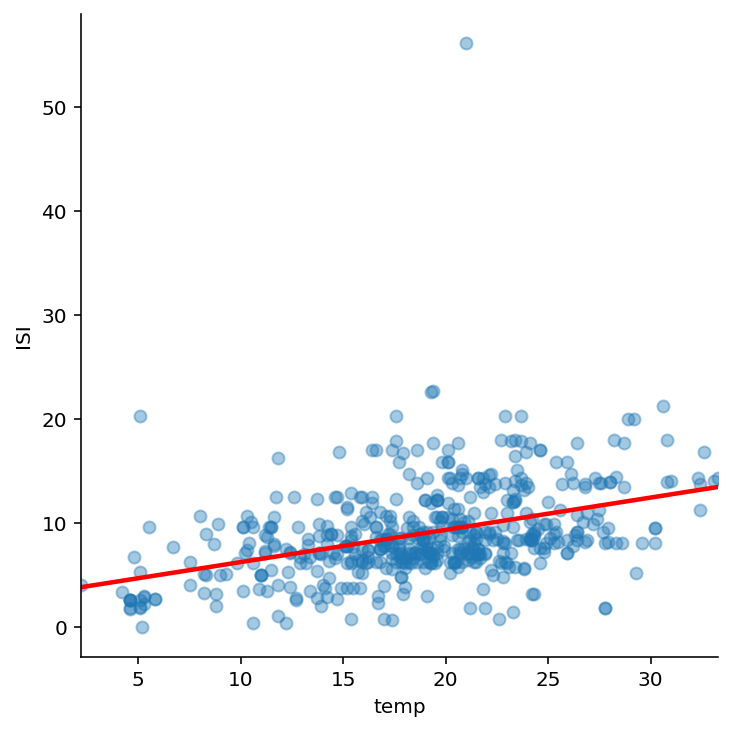

In [47]:
#กราฟแสดงความสัมพันธ์ระหว่าง ISI กับ temp
sns.lmplot(x='temp', y='ISI', data=df, ci=None, scatter_kws={'alpha':0.4}, line_kws={'color':'Red'})

# linear regression

In [48]:
#linear Regrssion
x = df[['temp']]
y = df['ISI']
x_train , x_test , y_train , y_test = train_test_split ( x, y, train_size = 0.8, random_state = 0)
model_temp = LinearRegression()
model_temp

LinearRegression()

In [49]:
#train
model_temp.fit(x_train, y_train)

LinearRegression()

In [50]:
model_temp.score( x_train , y_train )

0.15158426487690668

In [51]:
print('coefficients: ', model_temp.coef_)
print('Intercept: ', model_temp.intercept_)

coefficients:  [0.31382287]
Intercept:  3.1381799304959213


In [52]:
#test
ISI_temp = model_temp.predict(x_test)
ISI_temp

array([ 6.59023147, 10.60716416,  8.12796352, 11.42310362,  8.59869782,
       10.32472358,  7.90828751,  9.60293099,  8.22211038,  7.12373034,
        9.94813614,  4.58176512, 11.42310362,  6.46470232,  6.37055546,
        7.75137608,  9.19496126, 11.76830877,  5.89982116, 11.32895676,
        6.68437833, 10.5130173 ,  5.71152744,  8.4104041 , 10.01090072,
        8.91252068, 11.26619219,  9.91675386, 10.7640756 ,  9.13219669,
        7.75137608, 10.85822246,  8.12796352, 12.80392423, 11.98798478,
        9.28910812,  7.81414065,  8.28487495, 11.01513389, 12.86668881,
       10.01090072,  9.44601956,  8.50455096,  9.50878413, 10.95236932,
        9.1008144 , 12.33318993,  9.06943212,  8.91252068,  9.60293099,
        7.65722922,  8.50455096,  6.46470232,  9.06943212,  6.96681891,
        8.78699154,  5.24079314,  8.47316867,  7.97105208,  8.22211038,
        7.75137608, 10.60716416, 11.92522021, 10.32472358,  7.97105208,
        8.84975611,  9.85398928, 10.92098703,  8.06519894,  9.22

In [53]:
temp_test = pd.concat([ x_test , y_test ], axis='columns')
temp_test_cp=pd.concat([temp_test.reset_index(), pd.Series(ISI_temp, name='predicted')] , axis='columns')
temp_test_cp.head()

,index,temp,ISI,predicted
0,213,11.0,5.0,6.590231
1,435,23.8,5.6,10.607164
2,343,15.9,7.5,8.127964
3,230,26.4,9.2,11.423104
4,171,17.4,6.6,8.598698


In [54]:
#วัดประสิทธิภาพของโมเดล
print('MAE = ', metrics.mean_absolute_error(y_test, ISI_temp))
print('Mean squared error (MSE) = ', metrics.mean_squared_error(y_test, ISI_temp))
print('RMSE = ', np.sqrt(metrics.mean_squared_error(y_test, ISI_temp)))
#ถ้าค่าเป็น 1 แสดงว่าแม่นยำที่สุด
print("Coefficient of determination (R2-Score) = ",metrics.r2_score(y_test, ISI_temp))

MAE =  2.8759661414391666
Mean squared error (MSE) =  13.555860498411318
RMSE =  3.681828417839609
Coefficient of determination (R2-Score) =  0.17353272567895806


# WIND

In [55]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv" , usecols = [7,8,9,10])
df

,ISI,temp,RH,wind
0,5.1,8.2,51,6.7
1,6.7,18.0,33,0.9
2,6.7,14.6,33,1.3
3,9.0,8.3,97,4.0
4,9.6,11.4,99,1.8
...,...,...,...,...
512,1.9,27.8,32,2.7
513,1.9,21.9,71,5.8
514,1.9,21.2,70,6.7
515,11.3,25.6,42,4.0


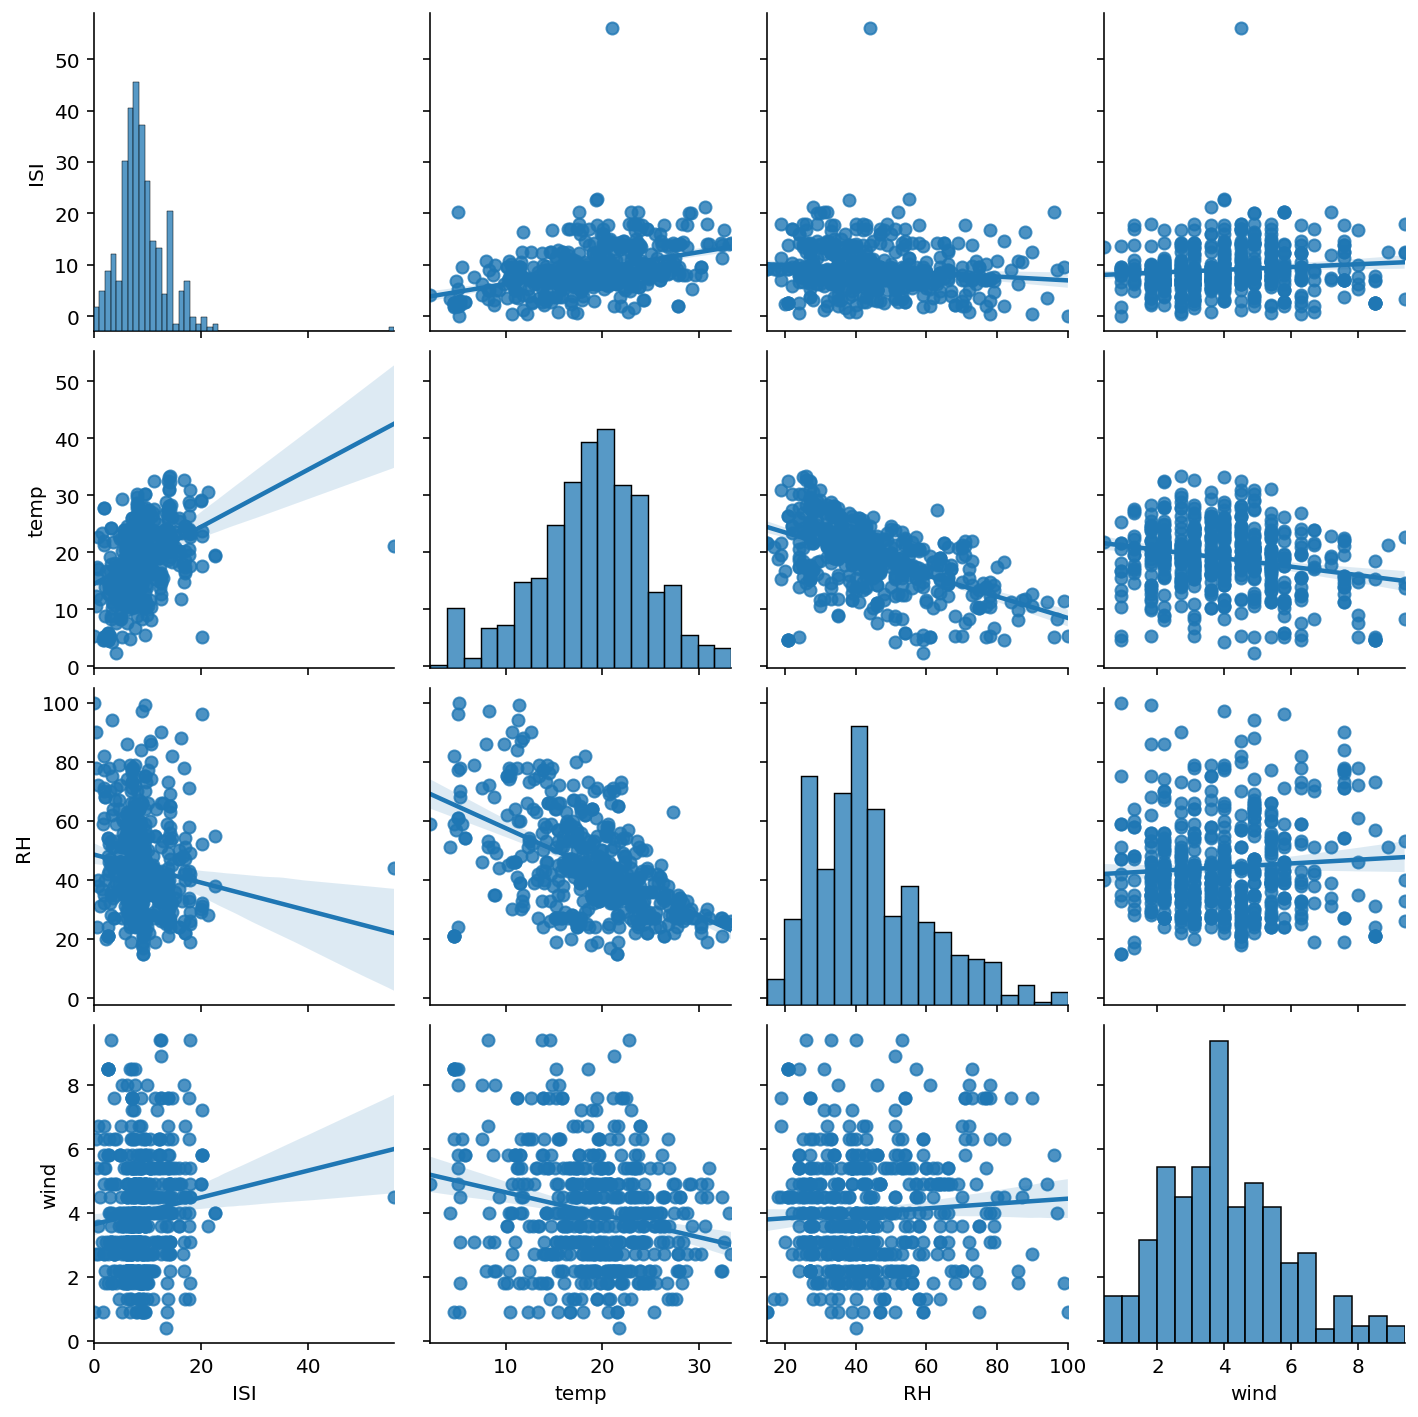

In [56]:
#แสดงความสัมพันธ์ทุกตัวแปร
sns.pairplot(df, kind='reg')

<AxesSubplot:>

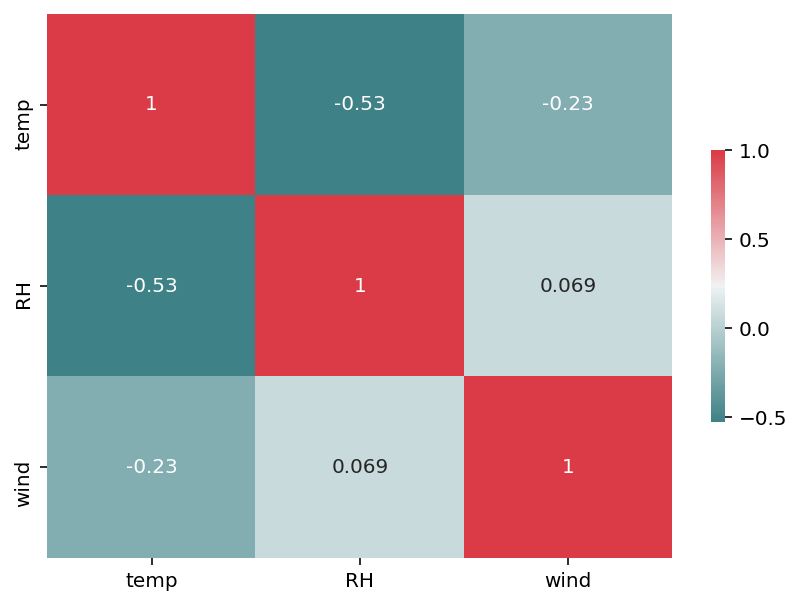

In [57]:
# Compute the correlation matrix
corr = df.drop(['ISI'], axis=1).corr()
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(7, 5))
cmap = sns.diverging_palette(200, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, annot=True, cbar_kws={"shrink": .5})

# Wind with ISI

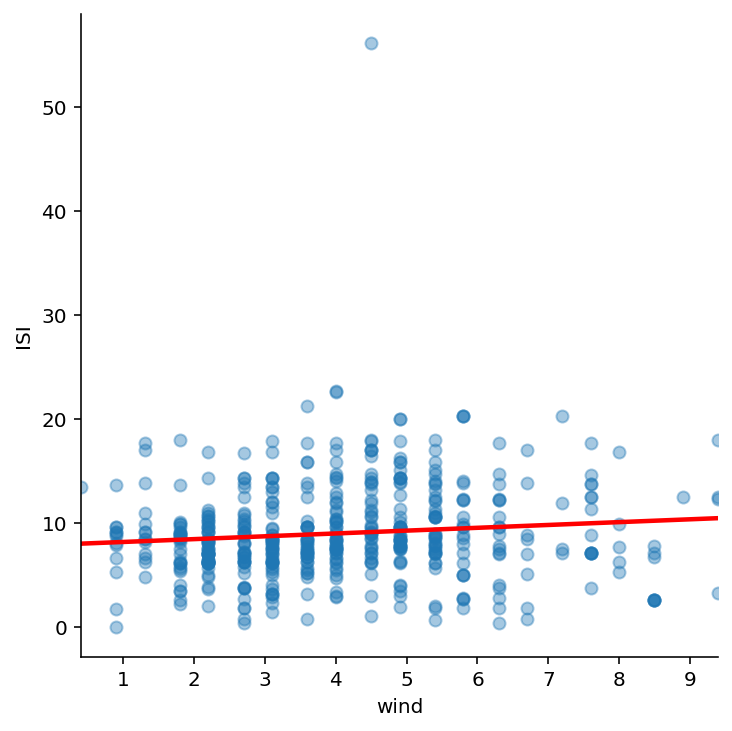

In [58]:
#กราฟแสดงความสัมพันธ์ระหว่าง ISI กับ wind
sns.lmplot(x='wind', y='ISI', data=df, ci=None, scatter_kws={'alpha':0.4}, line_kws={'color':'Red'})

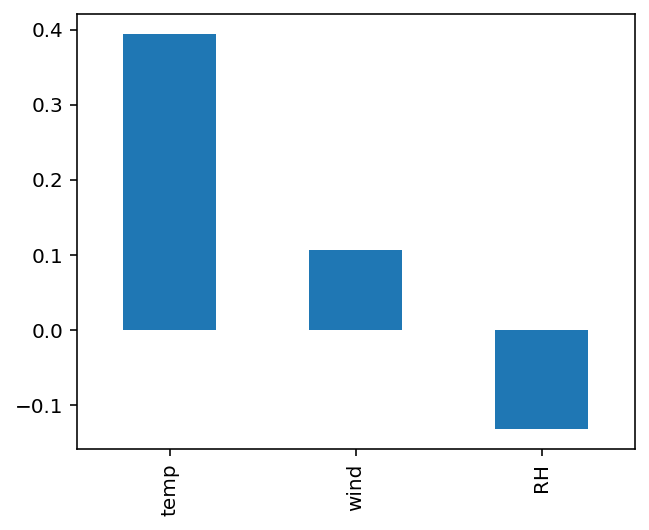

In [59]:
corr_with_isi = df.corr()['ISI'].sort_values(ascending=False)
plt.figure(figsize=(5,4))
corr_with_isi.drop('ISI').plot.bar()
plt.show();

# linear regression

In [60]:
#linear Regrssion
x = df[['wind']]
y = df['ISI']
x_train , x_test , y_train , y_test = train_test_split ( x, y, train_size = 0.8, random_state = 0)
model_wind = LinearRegression()
model_wind

LinearRegression()

In [61]:
#train
model_wind.fit(x_train, y_train)

LinearRegression()

In [62]:
model_wind.score(x_train , y_train )

0.021751185560820452

In [63]:
print('coefficients: ', model_wind.coef_)
print('Intercept: ', model_wind.intercept_)

coefficients:  [0.38069515]
Intercept:  7.541140617062858


In [64]:
#test
ISI_wind = model_wind.predict(x_test)
ISI_wind

array([ 9.74917248,  8.22639188,  9.25426878,  9.25426878,  9.06392121,
        9.59689442, 10.77704938,  8.03604431,  8.56901752,  8.22639188,
        7.69341868, 10.77704938,  8.56901752,  9.06392121,  9.06392121,
        8.56901752,  8.91164315,  9.25426878,  8.72129558,  9.06392121,
        9.59689442,  9.06392121, 11.11967501,  8.72129558,  9.06392121,
        8.72129558,  9.06392121,  9.40654684,  9.40654684,  8.56901752,
        8.91164315,  9.06392121,  8.91164315,  9.40654684,  8.22639188,
        9.74917248,  8.56901752,  8.03604431,  9.06392121,  9.59689442,
        9.74917248,  9.06392121,  9.59689442,  8.72129558,  8.37866994,
        9.74917248,  8.91164315,  8.56901752,  8.91164315,  8.91164315,
        9.59689442,  8.37866994,  9.40654684, 10.28214568,  9.40654684,
        7.88376625,  8.72129558, 10.09179811,  9.93952005,  8.72129558,
        9.74917248,  9.59689442,  9.25426878,  9.40654684,  9.25426878,
        8.22639188,  8.72129558,  9.06392121,  8.72129558, 10.43

In [65]:
test = pd.concat([x_test , y_test ], axis='columns')
test

,wind,ISI
213,5.8,5.0
435,1.8,5.6
343,4.5,7.5
230,4.5,9.2
171,4.0,6.6
...,...,...
154,2.7,8.1
49,5.8,5.0
100,5.4,10.6
153,4.9,15.9


In [66]:
wind_test_cp=pd.concat([test.reset_index(), pd.Series(ISI_wind, name='predicted')] , axis='columns')
wind_test_cp.head()

,index,wind,ISI,predicted
0,213,5.8,5.0,9.749172
1,435,1.8,5.6,8.226392
2,343,4.5,7.5,9.254269
3,230,4.5,9.2,9.254269
4,171,4.0,6.6,9.063921


In [67]:
#วัดประสิทธิภาพของโมเดล
print('MAE = ', metrics.mean_absolute_error(y_test, ISI_wind))
print('Mean squared error (MSE) = ', metrics.mean_squared_error(y_test, ISI_wind))
print('RMSE = ', np.sqrt(metrics.mean_squared_error(y_test, ISI_wind)))
#ถ้าค่าเป็น 1 แสดงว่าแม่นยำที่สุด
print("Coefficient of determination (R2-Score) = ",metrics.r2_score(y_test, ISI_wind))

MAE =  3.265137858700923
Mean squared error (MSE) =  17.343845368633474
RMSE =  4.16459426218611
Coefficient of determination (R2-Score) =  -0.05741133952654809


In [68]:
#แสดงค่าความแม่นยำด้วย R-Square หากมีค่าเป็น 1 แสดงว่าแม่นยำที่สุด
print("Score = ",metrics.r2_score(y_test, ISI_wind))

Score =  -0.05741133952654809


In [69]:
print('Coefficient:', model_wind.coef_)
print('Intercept:', model_wind.intercept_)
print('Mean squared error (MSE): %.2f' % metrics.mean_squared_error(y_test, ISI_wind))
print('Coefficient of determination (R^2): %.2f' % metrics.r2_score(y_test, ISI_wind))

Coefficient: [0.38069515]
Intercept: 7.541140617062858
Mean squared error (MSE): 17.34
Coefficient of determination (R^2): -0.06


# RH

In [70]:
df = pd.read_csv("forestfires.csv", usecols=[7,9])
df

,ISI,RH
0,5.1,51
1,6.7,33
2,6.7,33
3,9.0,97
4,9.6,99
...,...,...
512,1.9,32
513,1.9,71
514,1.9,70
515,11.3,42


In [71]:
df['RH'].value_counts()

27     33
39     24
35     20
43     17
42     17
       ..
94      1
96      1
97      1
99      1
100     1
Name: RH, Length: 75, dtype: int64

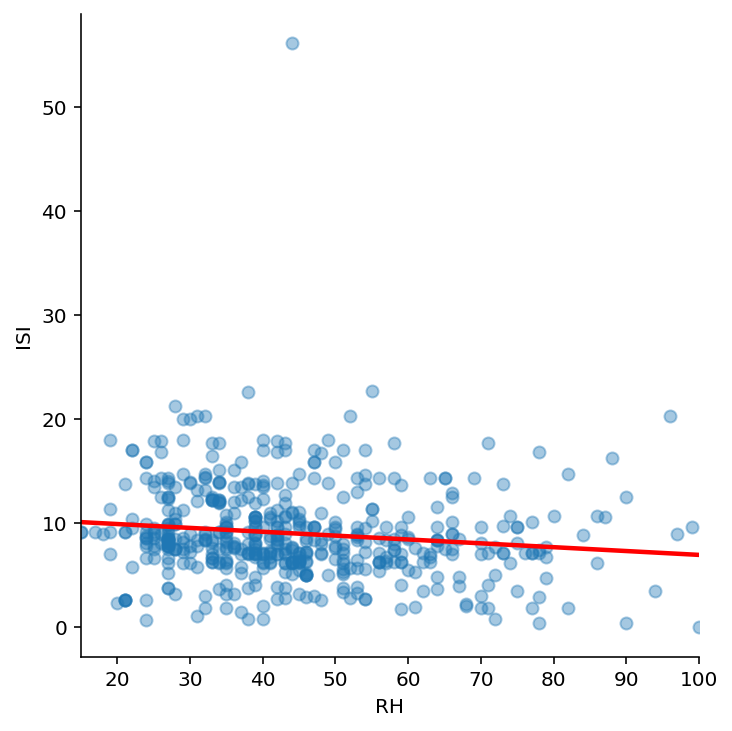

In [72]:
sns.lmplot(x="RH", y="ISI", data=df, ci=None, 
           scatter_kws={'alpha':0.4}, 
           line_kws={'color':'red'})

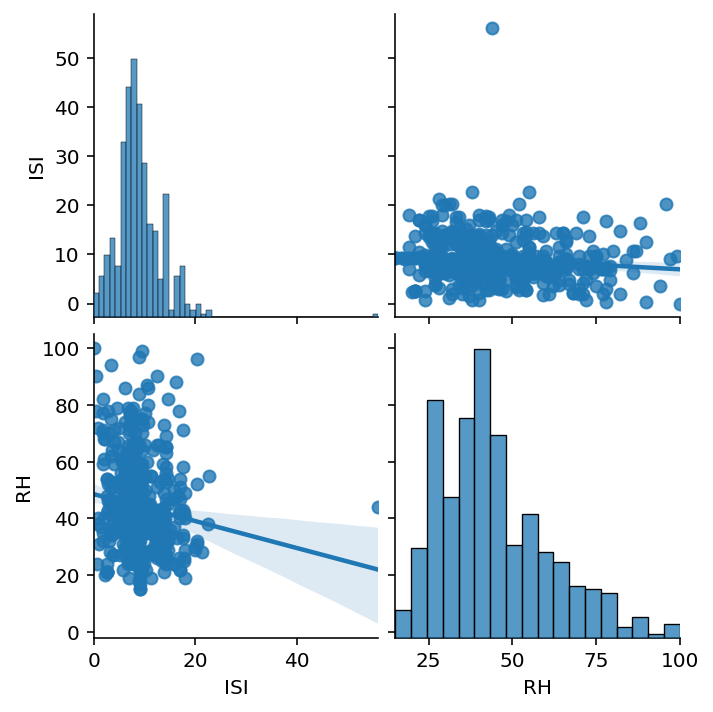

In [73]:
sns.pairplot(df, kind='reg');

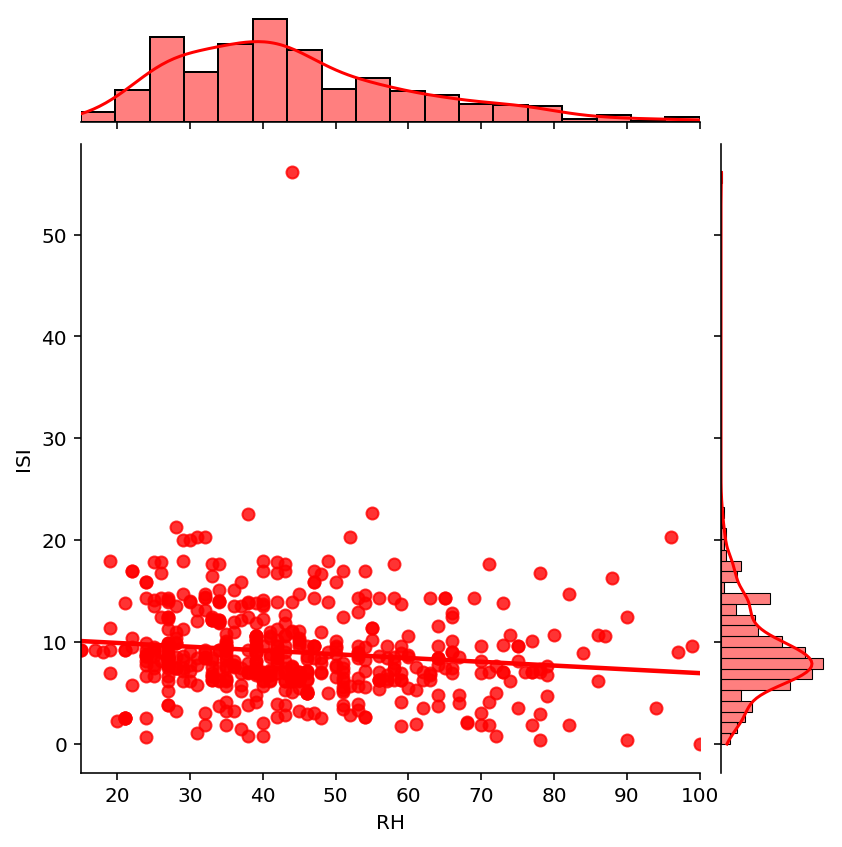

In [74]:
sns.jointplot(x='RH', y='ISI', data=df, kind='reg', ci=None,
            color='red');

In [75]:
from sklearn.linear_model import LinearRegression

In [76]:
modelRH = LinearRegression()
modelRH

LinearRegression()

In [77]:
x = df[["RH"]]
y = df["ISI"]

In [78]:
modelRH.fit(x, y)

LinearRegression()

In [79]:
modelRH.score(x, y)

0.01756080226610479

In [80]:
modelRH.intercept_

10.661582681337888

In [81]:
modelRH.coef_

array([-0.03702836])

In [82]:
modelRH.predict([[111]])

array([6.55143527])

In [83]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.8,random_state=0)

In [84]:
isi_pred = modelRH.predict(x_train)
isi_pred

array([ 9.29153354,  9.88398722,  9.40261861,  9.06936341,  8.69907986,
        8.77313657,  9.47667532,  9.36559025,  9.21747683,  8.81016493,
        9.3285619 ,  9.10639177,  8.5879948 ,  9.29153354,  8.9953067 ,
        8.5879948 ,  9.06936341,  8.03256947,  8.29176796,  7.95851276,
        8.55096644,  9.03233506,  9.77290216,  8.77313657,  8.9953067 ,
        9.77290216,  9.3285619 ,  9.21747683,  9.21747683,  8.81016493,
        8.5879948 ,  9.62478874,  9.03233506,  8.66205151,  9.18044848,
        8.29176796,  8.66205151,  8.73610822,  9.40261861,  9.43964696,
        8.55096644,  9.43964696,  9.66181709,  9.40261861,  9.10639177,
        9.3285619 ,  8.29176796,  8.95827835,  8.69907986,  9.77290216,
        8.9953067 ,  7.81039934,  7.99554112,  8.5879948 ,  9.58776038,
        8.66205151,  8.14365454,  7.77337099,  9.29153354,  9.06936341,
        8.95827835,  9.69884545,  8.40285302,  9.47667532,  8.88422164,
        9.47667532,  9.84695887,  9.62478874,  9.18044848,  9.66

In [85]:
isi_pred_test = modelRH.predict(x_test)
isi_pred_test

array([ 8.95827835,  8.77313657,  8.77313657,  9.88398722,  8.81016493,
        9.03233506,  9.51370367,  8.51393809,  8.32879631,  8.88422164,
        9.18044848,  9.88398722,  9.36559025,  9.55073203,  7.77337099,
        8.21771125,  9.21747683,  9.58776038,  9.36559025,  8.9953067 ,
        8.43988138,  9.66181709,  8.69907986,  9.06936341,  9.06936341,
        9.7358738 ,  9.77290216,  8.2547396 ,  9.66181709,  9.25450519,
        8.06959783,  9.03233506,  8.62502315,  9.55073203,  9.58776038,
        9.14342012,  9.25450519,  8.92124999,  9.66181709,  9.66181709,
        8.03256947,  9.18044848,  8.69907986,  8.9953067 ,  9.66181709,
        9.40261861,  9.66181709,  9.36559025,  8.9953067 ,  9.06936341,
        8.21771125,  9.14342012,  8.95827835,  9.40261861,  8.21771125,
        9.43964696,  7.73634263,  7.99554112,  8.69907986,  8.47690973,
        8.47690973,  9.47667532,  9.40261861,  9.21747683,  8.55096644,
        8.95827835,  9.43964696,  9.3285619 ,  9.06936341,  8.03

In [86]:
TEST = pd.concat([ x_test , y_test ], axis='columns')
TEST

,RH,ISI
213,46,5.0
435,51,5.6
343,51,7.5
230,21,9.2
171,50,6.6
...,...,...
305,52,5.7
48,35,4.1
341,51,6.5
373,42,13.9


In [87]:
da=pd.concat([TEST.reset_index(), pd.Series(isi_pred_test, name='predicted')] , axis='columns')
da

,index,RH,ISI,predicted
0,213,46,5.0,8.958278
1,435,51,5.6,8.773137
2,343,51,7.5,8.773137
3,230,21,9.2,9.883987
4,171,50,6.6,8.810165
...,...,...,...,...
409,305,52,5.7,8.736108
410,48,35,4.1,9.365590
411,341,51,6.5,8.773137
412,373,42,13.9,9.106392


# วัดประสิทธิภาพของโมเดล

In [88]:
print('MAE = ', metrics.mean_absolute_error(y_test, isi_pred_test))
print('MSE = ', metrics.mean_squared_error(y_test, isi_pred_test))
print('RMSE = ', np.sqrt(metrics.mean_squared_error(y_test, isi_pred_test)))

MAE =  3.2846578134502273
MSE =  22.261979073263007
RMSE =  4.718260174392994


In [89]:
print("Score = ",metrics.r2_score(y_test, isi_pred_test))

Score =  0.015474864467872718
